In [1]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit.Chem import MCS
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdMolDescriptors

import numpy as np
import pandas as pd
import seaborn as sns


#descriptor
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcNumHBD
from rdkit.Chem.rdMolDescriptors import CalcNumHBA
from rdkit.Chem.rdMolDescriptors import CalcTPSA

import matplotlib.pyplot as plt

from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric

C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  after removing the cwd from sys.path.

Bad key savefig.frameon in file C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\chris\anaconda3\envs\rdkit\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo i

In [2]:
data= pd.read_excel('tinib_139_after_preprocess_1.xlsx')

In [3]:
#data= pd.read_csv('train_original.txt')

In [4]:
smiles_list=data['smiles']

In [5]:
smiles_list

0       C1(C)CC(c2ccncc2NC(=O)c2c(N)ccc(C3CCCCC3)n2)CC...
1       c1(N(C2CCCNC2)C)ccc(Nc2ncc3c(n(C4CCCC4)c4c3ccn...
2          c12c(cc(I)cc1)C(=CNCc1cc(O)c(OC)cc1)C(=O)NC2=O
3       N1(C(c2c(C)nc(Nc3nc4n(C5CCCC5)c5c(ccnc5)c4cn3)...
4       n1nc(Nc2ncc3c4c(cncc4)n(C4CCCC4)c3n2)ccc1CC1CCNC1
                              ...                        
2751    c1(F)c(-c2c(F)cccc2F)nc(C(Nc2cnccc2N2CC(N)C(O)...
2752    C1N(c2cnc(Nc3ncc4c(n3)n(C3CCCC3)c3cnccc34)cc2)...
2753    c1c(F)c(-c2c(F)ccc(C(=O)Nc3cnccc3N3CC(C)C(O)C(...
2754    C1(C)CN(c2ccncc2NC(=O)c2ccc(F)c(-c3c(F)cccc3F)...
2755    CC1CN(c2cnc(Nc3nc4c(c5c(cncc5)n4C4CCCC4)cn3)cc...
Name: smiles, Length: 2756, dtype: object

In [6]:
mol_list=[]
for smiles in smiles_list:
    mol=Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

In [7]:
result=[]
for i in  range(len(mol_list)) :
    try:
        Chem.QED.properties(mol_list[i])
        result.append(True)
    except:
        result.append(False)

In [8]:
data['result']=result

In [9]:
data1=data[result]

In [10]:
data2=data1.reset_index(drop=True)

In [11]:
del data2['result']

In [12]:
data2

,Unnamed: 0,smiles
0,0,C1(C)CC(c2ccncc2NC(=O)c2c(N)ccc(C3CCCCC3)n2)CC...
1,1,c1(N(C2CCCNC2)C)ccc(Nc2ncc3c(n(C4CCCC4)c4c3ccn...
2,2,c12c(cc(I)cc1)C(=CNCc1cc(O)c(OC)cc1)C(=O)NC2=O
3,3,N1(C(c2c(C)nc(Nc3nc4n(C5CCCC5)c5c(ccnc5)c4cn3)...
4,4,n1nc(Nc2ncc3c4c(cncc4)n(C4CCCC4)c3n2)ccc1CC1CCNC1
...,...,...
2751,2751,c1(F)c(-c2c(F)cccc2F)nc(C(Nc2cnccc2N2CC(N)C(O)...
2752,2752,C1N(c2cnc(Nc3ncc4c(n3)n(C3CCCC3)c3cnccc34)cc2)...
2753,2753,c1c(F)c(-c2c(F)ccc(C(=O)Nc3cnccc3N3CC(C)C(O)C(...
2754,2754,C1(C)CN(c2ccncc2NC(=O)c2ccc(F)c(-c3c(F)cccc3F)...


In [13]:
del data2['Unnamed: 0']

In [14]:
smiles_list2=data2['smiles']

In [15]:
mol_list2=[]
for smiles in smiles_list2:
    mol=Chem.MolFromSmiles(smiles)
    mol_list2.append(mol)

In [16]:
MW=[]
for smiles in mol_list2:
    mol=ExactMolWt(smiles)
    MW.append(mol)

In [17]:
LogP=[]
for smiles in mol_list2:
    mol=MolLogP(smiles)
    LogP.append(mol)

In [18]:
HBD=[]
for smiles in mol_list2:
    mol=CalcNumHBD(smiles)
    HBD.append(mol)

In [19]:
HBA=[]
for smiles in mol_list2:
    mol=CalcNumHBA(smiles)
    HBA.append(mol)

In [20]:
TPSA=[]
for smiles in mol_list2:
    mol=CalcTPSA(smiles)
    TPSA.append(mol)

In [21]:
HBAD=[]
for smiles in mol_list2:
    mol=CalcNumHBD(smiles)+CalcNumHBA(smiles)
    HBAD.append(mol)

In [22]:
rota=[]
for smiles in mol_list2:
    mol=rdMolDescriptors.CalcNumRotatableBonds(smiles)
    rota.append(mol)

In [23]:
data2['MW']=MW
data2['LogP']=LogP
data2['HBA']=HBA
data2['HBD']=HBD
data2['TPSA']=TPSA
data2['HBA_HBD']=HBAD
data2['rotational bond']=rota

In [24]:
filter1=data2['MW']>=300
filter2=data2['MW']<=700
filter3=data2['LogP']>=2.0
filter4=data2['LogP']<=6.0
filter5=data2['HBD']>=2.0
filter6=data2['HBD']<=6.0
filter7=data2['HBA']>=0
filter8=data2['HBA']<=12.0
filter9=data2['HBA_HBD']<=14.0
filter10=data2['TPSA']>=60.0
filter11=data2['TPSA']<=140.0
filter12=data2['rotational bond']<=12.0
totalfilter=filter1&filter2&filter3&filter4&filter5&filter6&filter7&filter8&filter9&filter10&filter11&filter12

In [25]:
data3=data2[totalfilter]

In [26]:
data3=data3.reset_index(drop=True)

In [27]:
data3

,smiles,MW,LogP,HBA,HBD,TPSA,HBA_HBD,rotational bond
0,C1(C)CC(c2ccncc2NC(=O)c2c(N)ccc(C3CCCCC3)n2)CC...,407.268511,4.58970,5,3,106.92,8,4
1,c1(N(C2CCCNC2)C)ccc(Nc2ncc3c(n(C4CCCC4)c4c3ccn...,442.259343,4.42140,8,2,83.79,10,5
2,c12c(cc(I)cc1)C(=CNCc1cc(O)c(OC)cc1)C(=O)NC2=O,450.007655,2.40610,5,3,87.66,8,4
3,N1(C(c2c(C)nc(Nc3nc4n(C5CCCC5)c5c(ccnc5)c4cn3)...,456.238608,3.58702,8,2,100.86,10,4
4,n1nc(Nc2ncc3c4c(cncc4)n(C4CCCC4)c3n2)ccc1CC1CCNC1,414.228043,3.78020,8,2,93.44,10,5
...,...,...,...,...,...,...,...,...
2061,Fc1ccc(C)c(F)c1-c1nc(C(=O)Nc2cnccc2C2CC(N)CC(C...,442.163889,5.27492,5,2,80.90,7,4
2062,c1(F)c(-c2c(F)cccc2F)nc(C(Nc2cnccc2N2CC(N)C(O)...,475.163138,3.09660,6,3,104.37,9,4
2063,C1N(c2cnc(Nc3ncc4c(n3)n(C3CCCC3)c3cnccc34)cc2)...,442.259343,4.42140,8,2,83.79,10,4
2064,c1c(F)c(-c2c(F)ccc(C(=O)Nc3cnccc3N3CC(C)C(O)C(...,457.172560,2.95750,6,3,104.37,9,4


In [28]:
smiles_list=data3['smiles']

In [29]:
mol_list=[]
for smiles in smiles_list:
    mol=Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

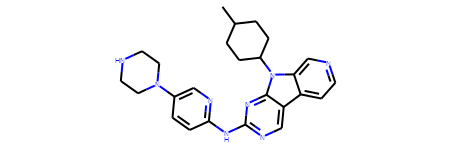

In [30]:
mol_list[151]

In [31]:
result=[]
for i in  range(len(mol_list)) :
    try:
        MakeScaffoldGeneric(mol_list[i])
        result.append(True)
    except:
        result.append(False)

In [32]:
data3['result']=result

In [33]:
data4=data3[result]

In [34]:
data4=data4.reset_index(drop=True)

In [35]:
del data4['result']

In [36]:
smiles_list=data4['smiles']

In [37]:
general_sca=[]
for smiles in smiles_list:
    tmp=MakeScaffoldGeneric(Chem.MolFromSmiles(smiles))
    general_sca.append(tmp)

In [38]:
def find_index(data, target):
  res = []
  lis = data
  while True:
    try:
      res.append(lis.index(target) + (res[-1]+1 if len(res)!=0 else 0)) #+1의 이유 : 0부터 시작이니까
      lis = data[res[-1]+1:]
    except:
      break     
  return res

In [54]:
result=[]
for i in  range(len(general_sca)) :
    try:
        Chem.MolToSmiles(general_sca[i])
        result.append(True)
    except:
        result.append(False)

In [57]:
print(find_index(result,False))

[]


In [62]:
p=Chem.MolFromSmiles('C1C(CCCC1)CC2CCCCC2')

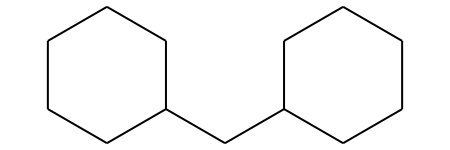

In [71]:
p

In [85]:
q=Chem.MolFromSmiles('C1C2C(CCC1)CCC2')

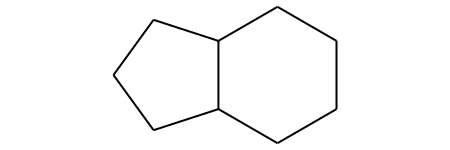

In [86]:
q

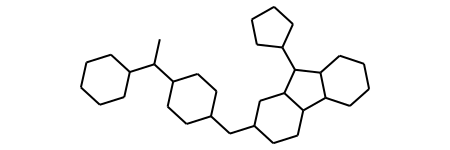

In [65]:
general_sca[1]

In [87]:
#substructure search
substructure_result=[]
for i in  range(len(general_sca)) :
    substructure_result.append(
    general_sca[i].HasSubstructMatch(q))
    

In [88]:
b=find_index(substructure_result,True)

In [89]:
len(a)

1088

In [90]:
len(b)

1047

In [83]:
b

[1,
 3,
 4,
 7,
 9,
 10,
 11,
 15,
 17,
 19,
 20,
 21,
 22,
 23,
 26,
 32,
 33,
 35,
 38,
 39,
 42,
 43,
 44,
 45,
 47,
 52,
 55,
 58,
 61,
 62,
 65,
 69,
 70,
 72,
 74,
 76,
 77,
 79,
 80,
 81,
 84,
 87,
 88,
 91,
 95,
 96,
 98,
 100,
 101,
 103,
 105,
 107,
 111,
 114,
 115,
 121,
 123,
 124,
 125,
 127,
 128,
 130,
 133,
 134,
 135,
 136,
 137,
 139,
 140,
 148,
 149,
 150,
 151,
 152,
 154,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 167,
 168,
 172,
 175,
 176,
 180,
 182,
 190,
 193,
 196,
 197,
 199,
 201,
 207,
 208,
 209,
 210,
 214,
 216,
 217,
 221,
 222,
 223,
 224,
 225,
 227,
 228,
 232,
 236,
 237,
 241,
 243,
 247,
 249,
 256,
 257,
 260,
 261,
 263,
 265,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 277,
 278,
 283,
 284,
 285,
 286,
 291,
 295,
 296,
 298,
 301,
 302,
 303,
 304,
 306,
 307,
 311,
 313,
 314,
 317,
 318,
 319,
 320,
 325,
 327,
 328,
 329,
 331,
 332,
 333,
 334,
 338,
 340,
 341,
 342,
 344,
 345,
 347,
 352,
 353,
 354,
 358,
 362,
 363,
 364,
 3

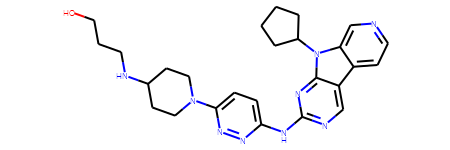

In [92]:
mol_list[690]